In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt 

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

# Illustrate LHS with Inducing Points

In [ ]:
lhs_1 = pd.read_csv('data/lhs_16.csv', index_col=0)
lhs_2 = pd.read_csv('data/lhs_4.csv', index_col=0)

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(lhs_1['V1'], lhs_1['V2'], marker = 'o', c = 'k')
ax.scatter(lhs_2['V1'], lhs_2['V2'], marker = 'o', c = 'r')
ax.set_yticks(np.linspace(0.0, 1.0, 3), minor=False)
ax.set_yticks(np.linspace(0.0, 1.0, 5), minor=True)
ax.set_xticks(np.linspace(0.0, 1.0, 3), minor=False)
ax.set_xticks(np.linspace(0.0, 1.0, 5), minor=True)
ax.yaxis.grid(True, which='major', linestyle = '-', c = 'r')
ax.yaxis.grid(True, which='minor', linestyle = '--')
ax.xaxis.grid(True, which='major', linestyle = '-', c = 'r')
ax.xaxis.grid(True, which='minor', linestyle = '--')
ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.0)
plt.ylabel(r'$\theta_{1}$', fontsize = fontSize)
plt.xlabel(r'$\theta_{0}$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.show()

# Bayesian Committee Machine

In [1]:
import torch
import matplotlib.pylab as plt 
from src.gp.bcm import BayesianMachine

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

### 1D Example

In [2]:
ndata = 50
inputs = torch.linspace(0.0, 2.0*torch.pi, ndata).view(ndata, 1)
yvals = torch.cos(inputs)
hyper = torch.Tensor([0.0, 0.0])
testpoint = torch.Tensor([[0.5]])

In [3]:
bcm_kmeans = BayesianMachine(inputs, yvals, 1E-4, n_clusters = 2)
bcm_exact = BayesianMachine(inputs, yvals, 1E-4)

In [4]:
config_exact = {'niter': 500, 'lrate': 1E-2, 'nrestart': 2}
config_kmean = {'niter': 500, 'lrate': 1E-2, 'nrestart': 2}

In [5]:
d_kmeans = bcm_kmeans.optimisation(hyper, config_kmean)
d_exact = bcm_exact.optimisation(hyper, config_exact)

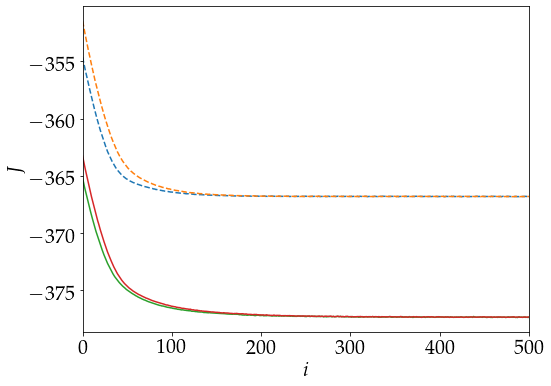

In [6]:
plt.figure(figsize=(8,6))
plt.plot(d_kmeans[0]['loss'], linestyle = '--')
plt.plot(d_kmeans[1]['loss'], linestyle = '--')
plt.plot(d_exact[0]['loss'], linestyle = '-')
plt.plot(d_exact[1]['loss'], linestyle = '-')
plt.xlim(0,500)
plt.ylabel(r'$J$', fontsize = fontSize)
plt.xlabel(r'$i$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.show()

In [7]:
torch.cos(torch.tensor(0.5))

tensor(0.8776)

In [8]:
bcm_exact.prediction(testpoint, var = True)

(tensor([0.8769]), tensor([9.5463e-06]))

In [9]:
bcm_kmeans.prediction(testpoint, True, 1, 'PoE')

(tensor([0.8764]), tensor([1.0042e-05]))

In [10]:
bcm_kmeans.prediction(testpoint, True, 1, 'BCM')

(tensor([0.8764]), tensor([1.0042e-05]))

In [11]:
# single unit prediction 
bcm_kmeans.single_unit_mean(testpoint)

tensor([0.8764])

In [12]:
bcm_exact.first_derivative(testpoint)

tensor([-0.4788])

In [13]:
bcm_kmeans.first_derivative(testpoint)

tensor([-0.4752])

#### Gradient

In [14]:
xmin = 0.0
xmax = 2.0 * torch.pi 
npoint = 1000

In [15]:
grid = torch.linspace(xmin, xmax, npoint)
grad = [bcm_exact.first_derivative(grid[i].view(1,1)) for i in range(npoint)]
grad_analytical = -torch.sin(grid)

pred = [bcm_exact.prediction(grid[i].view(1,1), False) for i in range(npoint)]
func = torch.cos(grid)

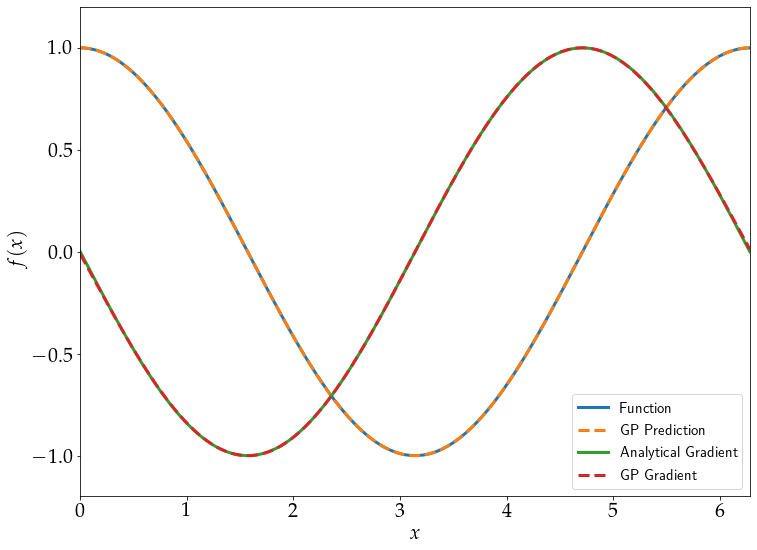

In [16]:
plt.figure(figsize = (12,9))
plt.plot(grid, func, label = 'Function', lw = 3)
plt.plot(grid, pred, label = 'GP Prediction', linestyle = '--', lw = 3)
plt.plot(grid, grad_analytical, label = 'Analytical Gradient', lw = 3)
plt.plot(grid, grad, label = 'GP Gradient', linestyle = '--', lw = 3)
plt.xlim(xmin, xmax)
plt.ylim(-1.2, 1.2)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.ylabel(r'$f(x)$', fontsize = fontSize)
plt.xlabel(r'$x$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.show()

### 2D Example

In [17]:
ndata = 150
inputs = torch.rand(ndata, 2)
yvals = inputs[:,0] * torch.cos(inputs[:,1])
hyper = torch.Tensor([0.0, 0.0, 0.0])
testpoint = torch.Tensor([[0.5, 0.5]])

In [18]:
bcm_kmeans = BayesianMachine(inputs, yvals, 1E-4, n_clusters = 2)
bcm_exact = BayesianMachine(inputs, yvals, 1E-4)

In [19]:
config_exact = {'niter': 500, 'lrate': 1E-2, 'nrestart': 2}
config_kmean = {'niter': 500, 'lrate': 1E-2, 'nrestart': 2}

In [20]:
d_kmeans = bcm_kmeans.optimisation(hyper, config_kmean)
d_exact = bcm_exact.optimisation(hyper, config_exact)

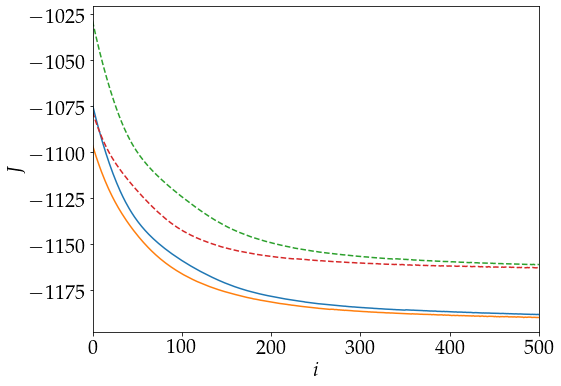

In [21]:
plt.figure(figsize=(8,6))
plt.plot(d_exact[0]['loss'], linestyle = '-')
plt.plot(d_exact[1]['loss'], linestyle = '-')
plt.plot(d_kmeans[0]['loss'], linestyle = '--')
plt.plot(d_kmeans[1]['loss'], linestyle = '--')
plt.ylabel(r'$J$', fontsize = fontSize)
plt.xlabel(r'$i$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(0,500)
plt.show()

In [22]:
testpoint[0, 0] * torch.cos(testpoint[0, 1])

tensor(0.4388)

In [23]:
bcm_exact.prediction(testpoint, var = True)

(tensor([0.4390]), tensor([4.5050e-07]))

In [24]:
bcm_kmeans.prediction(testpoint, True, 2, 'PoE')

(tensor([0.4390]), tensor([9.5877e-07]))

In [25]:
bcm_kmeans.prediction(testpoint, True, 2, 'BCM')

(tensor([0.4390]), tensor([9.5877e-07]))

In [26]:
bcm_kmeans.single_unit_mean(testpoint)

tensor([0.4389])

In [27]:
bcm_exact.first_derivative(testpoint)

tensor([ 0.8783, -0.2403])

In [28]:
bcm_kmeans.first_derivative(testpoint)

tensor([ 0.8819, -0.2408])

# Stochastic Variational GP 

In [29]:
from src.gp.svgp import SVGaussianProcess

In [30]:
inducing = torch.rand(10, 2)

In [31]:
stochasticGP = SVGaussianProcess(inputs, yvals, inducing)

In [32]:
lrate = 0.01
nepochs = 500
nbatch = 15
loss = stochasticGP.training(lrate, nepochs, nbatch)

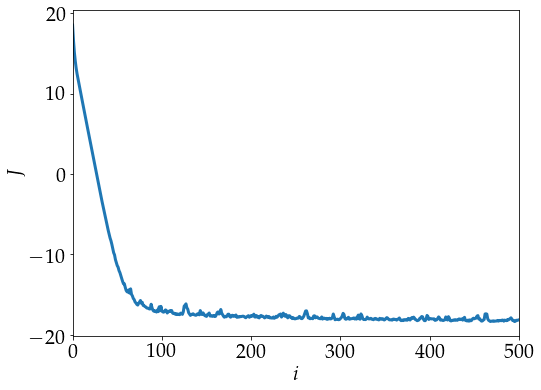

In [33]:
plt.figure(figsize=(8,6))
plt.plot(range(nepochs), loss, lw = 3)
plt.xlim(0,500)
plt.ylabel(r'$J$', fontsize = fontSize)
plt.xlabel(r'$i$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.show()

In [34]:
stochasticGP.predictions(testpoint, True)

(tensor([0.4389]), tensor([4.5492e-05]))

# CLASS Run 

In [1]:
from configemu import get_config
from emulator.trainingpoints import generate_training_pk, scale_lhs

In [2]:
config = get_config()
# cosmo = scale_lhs(config, 'lhs_5d_1000', True, fname='5d_1000') 
test = generate_training_pk(config, fname='5d_1000')

In [12]:
# import matplotlib.pylab as plt 
# import numpy as np 

# kgrid = np.geomspace(config.emulator.kmin, config.emulator.kmax, config.emulator.grid_nk)

# plt.figure(figsize = (12, 8))
# for i in range(5):
#     plt.plot(kgrid, test[0][:,i])
#     plt.yscale('log')
#     plt.xscale('log')
# plt.show()